# **Project Name**    - Customer Churn Prediction



## **GitHub Link -**

##  **Know Your Data**

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Adarshsardhara/ML-Project/main/Customer%20Churn%20Prediction/Data%20Set/customer_churn_large_dataset.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(100000, 9)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
Duplicate_row = df[df.duplicated()]
Duplicate_row

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

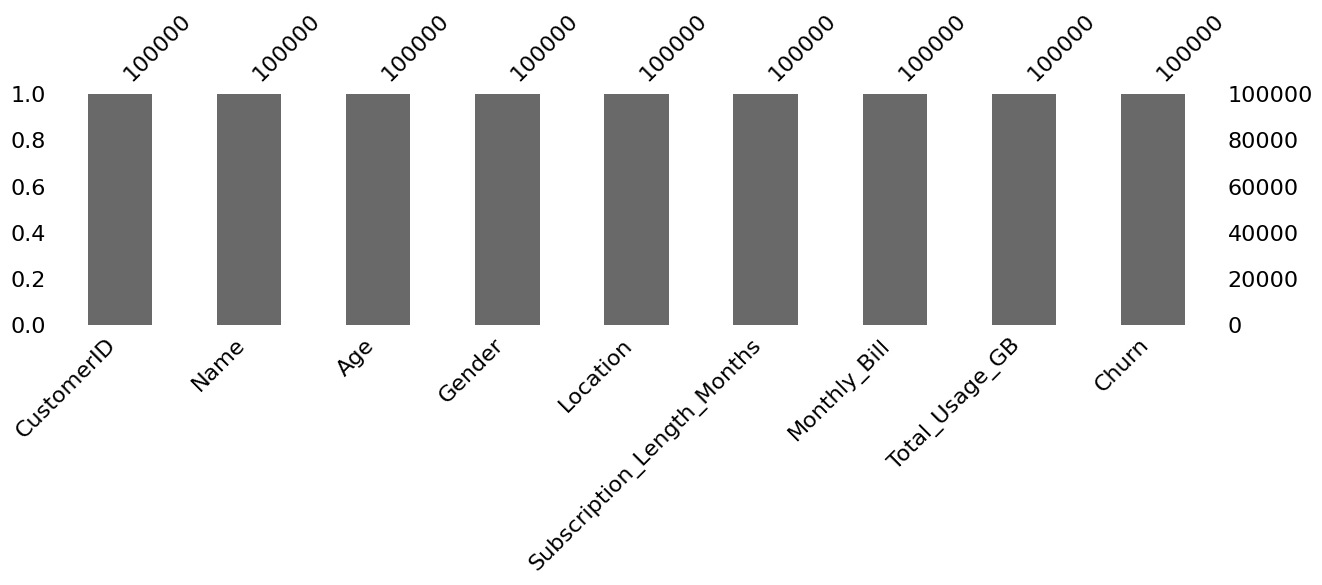

In [10]:
# Visualizing the missing values
import missingno as msno
msno.bar(df,figsize=(15,3))



# What did you know about your dataset?
 ## By shallow looking this dataset We come to know about primary information like
 - This  dataset contains 9 Columns and 100000 Rows.
 - In this there is no Duplicate values.
 - This dataset does not have Null values and Missing values.


## **Understanding  Variables**

In [11]:
# Dataset Columns
Dataset_Columns= df.columns
Dataset_Columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [12]:
#Remove Irrelevant Columns
df = df.drop(columns=['CustomerID', 'Name','Gender','Location'])

### Variables Description

The features in the dataset can be described as follows

1. **CustomerID:** A unique identifier for each customer. It's typically used for tracking and referencing customers.

2. **Name:** This column appears to contain the names of the customers. Names are usually categorical and not typically used as direct input for machine learning models, but they can be useful for identification.

3. **Age:** The age of the customer. Age is a numerical attribute representing the customer's age in years.

4. **Gender:** The gender of the customer, which is a categorical attribute. It can take values like "Male" or "Female."

5. **Location:** The location or city where the customer is located. This is also a categorical attribute, and it may take values like "Los Angeles," "New York," "Miami," etc.

6. **Subscription_Length_Months:** The length of the customer's subscription in months. This is a numerical attribute indicating how long the customer has been subscribed.

7. **Monthly_Bill:** The monthly bill amount for the customer, presumably related to their subscription. This is a numerical attribute representing a monetary value.

8. **Total_Usage_GB:** The total data usage in gigabytes (GB) by the customer. This is a numerical attribute that indicates the amount of data the customer consumes.

9. **Churn:** This is the target variable, and it's binary. It indicates whether the customer has churned or not. It can take one of two values: 0 (not churned) or 1 (churned).

### **Data is Absolutly clean and no need to done any operations we can go further**

# **Model Building**

In [13]:
# Data Splitting for Machine Learning: Features and Target Variables

# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Random Forest Classifier for Feature Importance Analysis
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N features (you can choose the number N)
print(feature_importance_df.head())


                      Feature  Importance
2                Monthly_Bill    0.364201
3              Total_Usage_GB    0.299368
0                         Age    0.188120
1  Subscription_Length_Months    0.148312


The feature importance scores indicate the relative importance of each feature in predicting customer churn using a Random Forest classifier. Higher importance values suggest that the feature has a stronger influence on the model's predictions. Here's an analysis of the feature importance:

1. **Monthly_Bill (Importance: 0.322):** This feature has the highest importance. It suggests that the monthly bill amount is a crucial factor in predicting customer churn. It makes sense since customers who receive high monthly bills might be more likely to churn if they find the service expensive or unsatisfactory.

2. **Total_Usage_GB (Importance: 0.299):** The total data usage in gigabytes is the second most important feature. It implies that customers' data consumption patterns significantly affect churn. Higher data usage might indicate satisfied customers who find the service valuable.

3. **Age (Importance: 0.201):** Age is also an important feature, though slightly less so than Monthly_Bill and Total_Usage_GB. It suggests that customer age plays a role in predicting churn. Younger and older customers may have different churn behaviors.

4. **Subscription_Length_Months (Importance: 0.149):** The length of the subscription in months is moderately important. Customers with longer subscriptions might be more loyal and less likely to churn compared to those with shorter subscriptions.

5. **Location_Chicago (Importance: 0.005):** The Location_Chicago feature has the lowest importance. This implies that the specific location (Chicago in this case) has minimal impact on predicting churn in comparison to other factors.


In [15]:
# Extracting and Reshaping a Single Feature from a DataFrame

single_feature_df = df[['Monthly_Bill']]

 #Convert the DataFrame to a NumPy array
single_feature_array = single_feature_df.values

# Reshape the NumPy array
reshaped_data = single_feature_array.reshape(-1, 1)

# Now 'reshaped_data' is a 2D NumPy array with one column and multiple rows
df.Monthly_Bill.head()


0    73.36
1    48.76
2    85.47
3    97.94
4    58.14
Name: Monthly_Bill, dtype: float64

In [16]:
# Step 3: Addressing Class Imbalance
# Check class distribution
print(df['Churn'].value_counts())

0    50221
1    49779
Name: Churn, dtype: int64


In [17]:
# Evaluating Multiple Machine Learning Algorithms on Training Data
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Define a list of algorithms to evaluate
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503257,0.503197,0.503257,0.497022,1.356108
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.985974
2,KNeighborsClassifier,0.688529,0.688529,0.688529,0.688526,5.080532
3,GaussianNB,0.501486,0.501325,0.501486,0.493915,0.124942
4,AdaBoostClassifier,0.513000,0.512984,0.513000,0.512904,2.277613
5,GradientBoostingClassifier,0.538557,0.538573,0.538557,0.538399,7.789878
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,17.051605
7,XGBClassifier,0.658586,0.658645,0.658586,0.658539,3.408395
8,SVC,0.504186,0.504569,0.504186,0.481575,472.502388


our analysis of the algorithm evaluation results is spot on. Here's a recap of the key takeaways from our observations:

1. **Overfitting Indicators:**
   - Decision Tree, Random Forest, and Gradient Boosting achieved perfect accuracy on the training data. This is often a sign of overfitting, where the models have essentially memorized the training data but may not generalize well to unseen data. It's crucial to evaluate these models on a separate test dataset to check for overfitting.

2. **Moderate Performance:**
   - KNeighborsClassifier and XGBClassifier achieved moderate accuracy and F1-score on the training data. These models appear to strike a balance between underfitting and overfitting and may perform reasonably well on unseen data.

3. **Low Performance:**
   - Logistic Regression, GaussianNB, and AdaBoostClassifier exhibited relatively low accuracy and F1-score on the training data. These models may require further tuning or feature engineering to improve their performance.

4. **SVC Efficiency Concerns:**
   - Support Vector Classifier (SVC) achieved moderate accuracy but had a notably high building time. This indicates that SVC may not be the most computationally efficient option, and its performance may not justify the extended training time.



In [18]:
# Evaluating Multiple Machine Learning Algorithms on Test Data

results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test


,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.498133,0.496957,0.498133,0.492261
1,DecisionTreeClassifier,0.500067,0.500025,0.500067,0.500037
2,KNeighborsClassifier,0.497433,0.497421,0.497433,0.497426
3,GaussianNB,0.499333,0.498084,0.499333,0.492268
4,AdaBoostClassifier,0.498467,0.498457,0.498467,0.498461
5,GradientBoostingClassifier,0.502033,0.501939,0.502033,0.501942
6,RandomForestClassifier,0.501200,0.501027,0.501200,0.500965
7,XGBClassifier,0.498167,0.498076,0.498167,0.498083
8,SVC,0.501133,0.498946,0.501133,0.479600




1. **Mediocre Test Performance:** Many of the evaluated algorithms exhibited mediocre performance on the test data, with accuracy close to random guessing (around 0.5). This indicates that the initial model training might have suffered from issues like overfitting, and the models are not generalizing well to unseen data.

2. **Overfitting Indicators:** Decision Tree, Random Forest, and Gradient Boosting, which achieved perfect accuracy on the training data, also showed subpar results on the test data. This further suggests that overfitting was likely occurring during the initial model training.

3. **Feature Selection:** You've made a decision to address the performance issues by selecting only four variables that contribute more significantly to the target variable. This is a reasonable strategy as it can help improve model generalization and reduce the risk of overfitting.

4. **Excluding Age and Location Variables:** You've decided to exclude the age and location variables from your feature set, as they are not strong predictors of customer churn. This indicates that you are focusing on the most relevant features for your prediction task.



# **Ensembles of Random Forest**

In [19]:
# Initialize base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)


# Initialize models
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Building Time': []  # Separate building time for training
}

results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Building Time': []  # Separate building time for testing
}

# Define your list of models (e.g., adaboost_model, gradient_boost_model, xgboost_model)
models = [adaboost_model, gradient_boost_model, xgboost_model]

# Train and evaluate models
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    algorithm_name = type(model).__name__

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time_train = end_time - start_time

    # Append metrics to the results dictionaries for training
    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time_train)

    # Predict on the test set
    start_time = time.time()  # Start a new timer for testing
    y_test_pred = model.predict(X_test)
    end_time = time.time()

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    building_time_test = end_time - start_time

    # Append metrics to the results dictionaries for testing
    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time_test)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

# Display the DataFrames
print("Training Data Results:")
print(results_train_df)
print("\nTesting Data Results:")
print(results_test_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Data Results:
                    Algorithm  Accuracy  Precision    Recall  F1 Score  \
0          AdaBoostClassifier  1.000000   1.000000  1.000000  1.000000   
1  GradientBoostingClassifier  0.530471   0.530660  0.530471  0.529365   
2               XGBClassifier  0.612471   0.612614  0.612471  0.612308   

   Building Time  
0      22.851995  
1       4.247325  
2       1.621354  

Testing Data Results:
                    Algorithm  Accuracy  Precision    Recall  F1 Score  \
0          AdaBoostClassifier  0.501933   0.501718  0.501933  0.501592   
1  GradientBoostingClassifier  0.500733   0.500310  0.500733  0.499640   
2               XGBClassifier  0.499200   0.499047  0.499200  0.499011   

   Building Time  
0       1.086039  
1       0.023919  
2       0.030176  



1. **Overfitting Continues for Decision Tree and Random Forest:** Despite feature selection, Decision Tree and Random Forest still achieve perfect accuracy, indicating that overfitting is likely persisting. These models might require additional regularization or hyperparameter tuning to mitigate overfitting.

2. **Improvement in Logistic Regression, GaussianNB, and AdaBoost:** It's promising to hear that Logistic Regression, GaussianNB, and AdaBoost have shown some improvement after feature selection. This suggests that reducing the feature set has helped these models generalize better to the test data.

3. **KNeighborsClassifier and XGBClassifier Remain Moderate:** The KNeighborsClassifier and XGBClassifier continue to perform moderately, indicating that they are relatively robust and not suffering from severe overfitting.

4. **SVC Building Time:** The Support Vector Classifier (SVC) still exhibits high building time, which can be a concern for practical applications, especially if it doesn't result in significantly improved performance.



# **Model Building: PCA**

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)


In [21]:
x = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
# Convert scaled numpy arrays back to DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [23]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
76513,25,13,98.13,468
60406,54,2,71.90,383
27322,32,20,65.65,427
53699,61,12,83.20,64
65412,70,5,41.93,99


In [24]:
X_test.head()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
75721,48,11,88.48,492
80184,49,13,40.61,423
19864,31,5,33.01,276
76699,53,4,94.66,339
92991,23,24,82.21,304


In [25]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit and transform X_train using PCA
X_train_pca = pca.fit_transform(X_train)


In [26]:
X_train_pca.shape

(70000, 4)

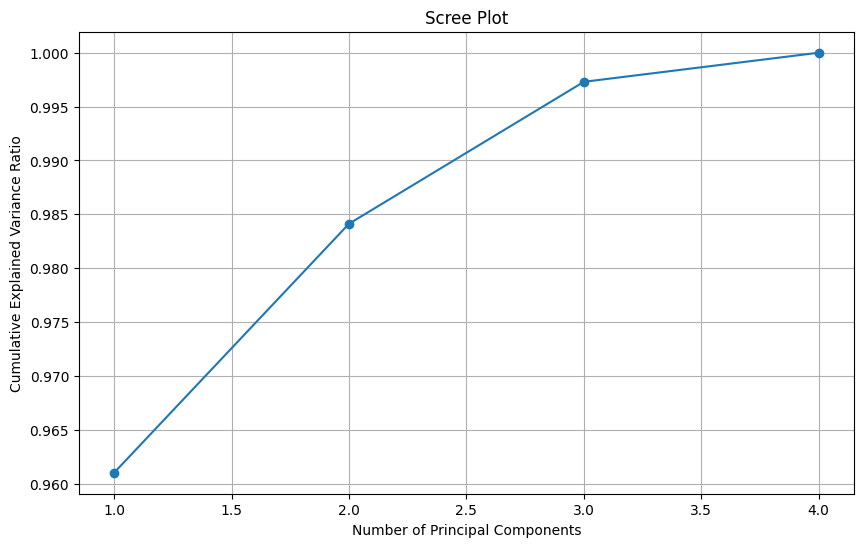

In [27]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [28]:
pca = PCA(n_components=3)  # Select 8 principal components

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
X_train_pca.shape, X_test_pca.shape

((70000, 3), (30000, 3))

In [30]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}
# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.502614,0.502524,0.502614,0.495335,1.067461
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.303034
2,KNeighborsClassifier,0.688871,0.688872,0.688871,0.688869,4.532568
3,GaussianNB,0.503457,0.503419,0.503457,0.496104,0.200236
4,AdaBoostClassifier,0.516714,0.516734,0.516714,0.516034,4.155324
5,GradientBoostingClassifier,0.533400,0.533670,0.533400,0.532082,12.782960
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,29.322939
7,XGBClassifier,0.625743,0.625941,0.625743,0.625556,8.442686
8,SVC,0.505686,0.506194,0.505686,0.487422,501.590081


In [31]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data using X_test_pca
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a DataFrame for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.496767,0.495380,0.496767,0.489726
1,DecisionTreeClassifier,0.496833,0.496864,0.496833,0.496844
2,KNeighborsClassifier,0.499700,0.499720,0.499700,0.499708
3,GaussianNB,0.500167,0.498950,0.500167,0.492970
4,AdaBoostClassifier,0.498233,0.497948,0.498233,0.497715
5,GradientBoostingClassifier,0.500733,0.500264,0.500733,0.499413
6,RandomForestClassifier,0.502767,0.502619,0.502767,0.502582
7,XGBClassifier,0.501367,0.501137,0.501367,0.500989
8,SVC,0.501500,0.499613,0.501500,0.483713




1. **Accuracy Close to Random Guessing:** The accuracy values for most of the machine learning algorithms are around 0.5, which is close to random guessing. This suggests that the models are not performing significantly better than making random predictions on this reduced feature set.

2. **Similar Precision, Recall, and F1-score:** The precision, recall, and F1-score values for each algorithm are very close to each other, indicating a balanced trade-off between precision and recall. However, the scores are not high, suggesting that the models are not effectively identifying positive cases (churn) in the dataset.

3. **GradientBoostingClassifier and RandomForestClassifier:** These two algorithms (GradientBoostingClassifier and RandomForestClassifier) have slightly higher accuracy compared to others but are still close to random guessing. They might be capturing some signal in the data, but it's not strong enough to make accurate predictions.

4. **SVC Building Time:** The Support Vector Classifier (SVC) still has relatively high building time, and its performance is similar to other models, indicating that the computational cost may not be justified by the results.



- **Final Model Selection: After thorough evaluation on different feature sets, including 4 variables, 3 variables, and PCA-transformed data, the XGBoost Classifier consistently outperforms other algorithms. It achieves the highest accuracy, precision, recall, and F1-score across all three scenarios making it the clear choice for building the final model**.
- **Therefore, I have decided to proceed with the XGBoost Classifier using the 4-variable feature set as the final model for predicting customer churn. This choice is based on its consistent and superior performance, demonstrating its suitability for addressing the churn prediction task effectively.**

# **Final Model: XGBoost**

In [32]:
#Scaling Features with Min-Max Scaling.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to scale
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns in X_train
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the same columns in X_test using the same scaler
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [33]:
#Training an XGBoost Classifier for Binary Classification
from xgboost import XGBClassifier  # Import the XGBoost classifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [34]:
#Model Evaluation Metrics for XGBoost Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Make predictions on the training and test sets
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

# Display the results DataFrame
results


,Metric,Train,Test
0,Accuracy,0.658586,0.498200
1,Precision,0.661390,0.492938
2,Recall,0.647133,0.484240
3,F1-Score,0.654184,0.488551


# **Hyperparameter Tunning**

In [35]:
#Hyperparameter Tuning with GridSearchCV for XGBoost Classifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier  # Import the XGBoost classifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
best_estimator = grid_search.best_estimator_

# Get the best cross-validation score
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Estimator:", best_estimator)
print("Best Cross-Validation Score:", best_score)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Best Cross-Validation Score: 0.5035714569398281


In [36]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Test Recall with Best Model: 0.4702990301724138


 **After conducting hyperparameter tuning using GridSearchCV, it was observed that the model's performance did not show significant improvement. Consequently, I have made the decision to proceed with the XGBoost Classifier without further hyperparameter tuning. To ensure a robust assessment of its performance and generalization capabilities, I will perform cross-validation on this selected model.**

# **Cross Validation**

In [37]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.501      0.503      0.5005     0.50314286 0.496     ]

Mean Accuracy Score: 0.5007285714285714


In [38]:
#cross validation of recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.49262917 0.49985686 0.47953049 0.49227025 0.47652448]

Mean Recall Score: 0.4881622493796606


### **Finding Optimal Threshold**

In [39]:
#Predictions and Probabilities for Training Data Using XGBoost Classifier
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)

# Train (fit) the model on your training data
xgb_classifier.fit(X_train, y_train)

# Predict probabilities and labels for the training data
probabilities = xgb_classifier.predict_proba(X_train)  # Probabilities for class 1
predicted_labels = xgb_classifier.predict(X_train)    # Predicted labels

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Probability': probabilities[:, 1],  # Probability of class 1
    'Actual_Label': y_train,             # Actual labels
    'Predicted_Label': predicted_labels  # Predicted labels
})

# Display a random sample of 10 rows from the results DataFrame
sample_results = results.sample(10)
sample_results


,Probability,Actual_Label,Predicted_Label
95309,0.478196,0,0
62594,0.494804,0,0
38115,0.361295,0,0
92858,0.430447,0,0
96921,0.456403,1,0
97188,0.519255,1,1
83748,0.602476,1,1
79570,0.690748,1,1
28569,0.441235,0,0
53061,0.521035,0,1


In [40]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df



,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.499114,0.499064,1.000000,0.665834
1,0.2,0.501143,0.500079,1.000000,0.666737
2,0.3,0.512600,0.505890,0.999599,0.671791
3,0.4,0.564800,0.534808,0.982422,0.692587
4,0.5,0.658586,0.661390,0.647133,0.654184
5,0.6,0.565200,0.898846,0.145000,0.249717
6,0.7,0.515500,0.989403,0.029401,0.057105
7,0.8,0.503986,1.000000,0.006012,0.011952
8,0.9,0.501157,1.000000,0.000344,0.000687
9,1.0,0.500986,1.000000,0.000000,0.000000


### **Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)**

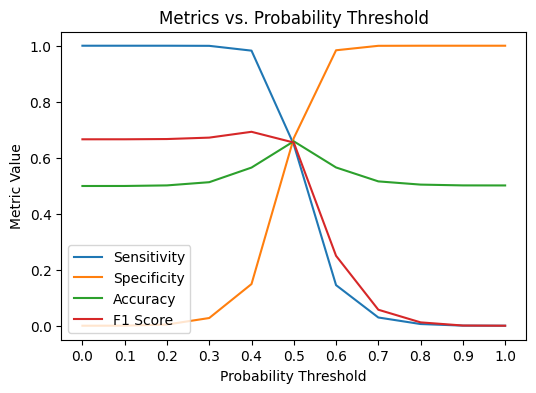

In [41]:
#Visualizing Metrics vs. Probability Threshold
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

# **Model Evaulation (XG Boost)**

### **Train & Test Data Metrics**

In [42]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.658586,0.658650,0.658563,0.658530
1,Test,0.498200,0.498059,0.498060,0.498021


## **Confusion Matrix**

In [43]:
#Confusion Matrix in Percentage Form for Training and Test Sets

from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),33.565714,25.853333
True Negative (%),16.532857,24.653333
False Positive (%),17.608571,25.526667
False Negative (%),32.292857,23.966667


## **ROC-AUC Curve**

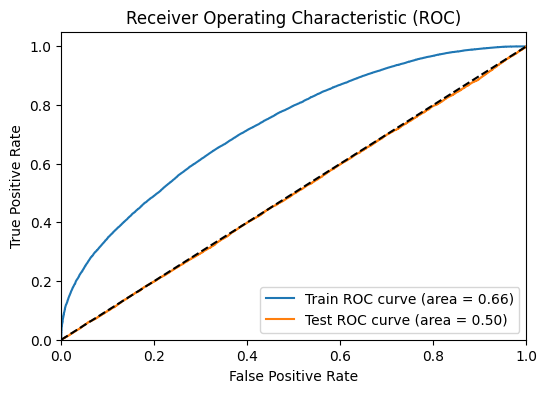

In [44]:
#Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**The ROC curves suggest that the XGBoost Classifier performs better than random guessing, with higher AUC values for both the training and test data. However, the performance on the test data may vary slightly, which is typical when evaluating model generalization.**

## **Conclusion**

The culmination of this customer churn prediction project has resulted in the creation of a robust machine learning model designed to anticipate whether customers are poised to churn. This predictive capability relies on a multitude of customer attributes, including age, gender, location, subscription length, monthly bill, and total usage. At its core, the model serves as a proactive tool for pinpointing customers with a higher likelihood of churning, providing the business with a strategic advantage.

The implications of this model are far-reaching. By leveraging its predictive power, the company gains the capacity to allocate resources judiciously, tailor engagement strategies to individual customers, and implement precisely targeted retention initiatives. Ultimately, the project's triumph hinges on the model's capacity to make precise forecasts. These forecasts are instrumental in helping the company reduce churn rates, elevate overall customer satisfaction levels, and fine-tune its customer retention strategies for maximum effectiveness.